# Data Acquisition

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import scipy.stats as stats 
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import requests
import os

from tqdm import tqdm

pd.set_option('display.max_columns',None)
pd.set_option('display.max_columns',50)


def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_base.csv"
filename = "laptops.csv"
download(url, filename)

## Read File

In [5]:
df = pd.read_csv(filename, header=None)
print(df.head())

     0   1          2   3   4   5       6    7   8    9     10    11
0  Acer   4  IPS Panel   2   1   5   35.56  1.6   8  256   1.6   978
1  Dell   3    Full HD   1   1   3  39.624  2.0   4  256   2.2   634
2  Dell   3    Full HD   1   1   7  39.624  2.7   8  256   2.2   946
3  Dell   4  IPS Panel   2   1   5  33.782  1.6   8  128  1.22  1244
4    HP   4    Full HD   2   1   7  39.624  1.8   8  256  1.91   837


In [6]:
headers = ["Manufacturer", "Category", "Type_of_Screen", "GPU", "OS", "CPU_core", "Screen_Size_CM", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg","Price"]

In [7]:
df.columns = headers

# Data Preprocessing before EDA

## Data Overview

In [10]:
df.head(5)

,Manufacturer,Category,Type_of_Screen,GPU,OS,CPU_core,Screen_Size_CM,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Type_of_Screen  238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_CM  238 non-null    object 
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       238 non-null    object 
 11  Price           238 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 22.4+ KB


In [12]:
df.shape

(238, 12)

In [13]:
df.columns

Index(['Manufacturer', 'Category', 'Type_of_Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_CM', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')

In [14]:
df.nunique()

Manufacturer       11
Category            5
Type_of_Screen      2
GPU                 3
OS                  2
CPU_core            3
Screen_Size_CM     10
CPU_frequency      11
RAM_GB              5
Storage_GB_SSD      2
Weight_kg          78
Price             193
dtype: int64

In [15]:
df["CPU_frequency"].value_counts()

CPU_frequency
2.5    71
2.7    43
1.6    30
2.8    25
1.8    23
2.6    11
2.3    11
2.4    10
2.0     9
2.9     4
1.2     1
Name: count, dtype: int64

In [16]:
df.isnull().sum()

Manufacturer      0
Category          0
Type_of_Screen    0
GPU               0
OS                0
CPU_core          0
Screen_Size_CM    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

In [17]:
df.isna().sum()

Manufacturer      0
Category          0
Type_of_Screen    0
GPU               0
OS                0
CPU_core          0
Screen_Size_CM    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

In [18]:
df.dtypes

Manufacturer       object
Category            int64
Type_of_Screen     object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_CM     object
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg          object
Price               int64
dtype: object

In [19]:
for column in df.columns:
    print(f'Unique values in {column}: {df[column].unique()}')

Unique values in Manufacturer: ['Acer' 'Dell' 'HP' 'Asus' 'Lenovo' 'Huawei' 'Toshiba' 'MSI' 'Razer'
 'Samsung' 'Xiaomi']
Unique values in Category: [4 3 1 5 2]
Unique values in Type_of_Screen: ['IPS Panel' 'Full HD']
Unique values in GPU: [2 1 3]
Unique values in OS: [1 2]
Unique values in CPU_core: [5 3 7]
Unique values in Screen_Size_CM: ['35.56' '39.624' '33.782' '38.1' '33.02' '43.942' '43.18' '31.75' '30.48'
 '?']
Unique values in CPU_frequency: [1.6 2.  2.7 1.8 2.5 2.4 2.8 1.2 2.9 2.6 2.3]
Unique values in RAM_GB: [ 8  4  6 16 12]
Unique values in Storage_GB_SSD: [256 128]
Unique values in Weight_kg: ['1.6' '2.2' '1.22' '1.91' '2.1' '2.3' '2.13' '2' '1.7' '1.4' '1.86'
 '1.88' '1.63' '1.83' '1.96' '1.21' '2.65' '1.25' '1.38' '?' '1.3' '1.58'
 '2.5' '1.75' '1.48' '3' '1.05' '1.12' '1.2' '2.56' '3.6' '1.41' '2.05'
 '1.95' '3.42' '1.1' '1.26' '1.84' '2.6' '1.36' '2.33' '1.5' '2.7' '1.9'
 '1.43' '2.31' '1.64' '2.17' '1.65' '2.67' '1.42' '1.78' '1.49' '1.44'
 '1.29' '2.04' '1.32' '2.02

## Handling Missing Values

Here I found "?" to be unknown hence replacing it with np.NaN

In [22]:
df.replace("?", np.NaN, inplace = True)

Checking for Non- Numeric Values in Numeric columns

In [24]:
for column in df.select_dtypes(include=[np.number]).columns:
        non_numeric = df[pd.to_numeric(df[column], errors='coerce').isna()]
        if not non_numeric.empty:
            print(f'Non-numeric values in {column}:\n', non_numeric)

There are no non numeric values in any numeric columns

In [26]:
df.describe(include = "all")

,Manufacturer,Category,Type_of_Screen,GPU,OS,CPU_core,Screen_Size_CM,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238,238.000000,238,238.000000,238.000000,238.000000,234,238.000000,238.000000,238.000000,233,238.000000
unique,11,NaN,2,NaN,NaN,NaN,9,NaN,NaN,NaN,77,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,39.624,NaN,NaN,NaN,2.2,NaN
freq,71,NaN,161,NaN,NaN,NaN,89,NaN,NaN,NaN,21,NaN
mean,NaN,3.205882,NaN,2.151261,1.058824,5.630252,NaN,2.360084,7.882353,245.781513,NaN,1462.344538
std,NaN,0.776533,NaN,0.638282,0.235790,1.241787,NaN,0.411393,2.482603,34.765316,NaN,574.607699
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,NaN,1.200000,4.000000,128.000000,NaN,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.000000,8.000000,256.000000,NaN,1066.500000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.500000,8.000000,256.000000,NaN,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,NaN,2.700000,8.000000,256.000000,NaN,1777.000000


## Data Formatting

Here Screen_Size_inch, Weight_kg should be of float type hence converting their data type

In [29]:
df["Screen_Size_CM"] = df["Screen_Size_CM"].astype("float64")

In [30]:
df["Weight_kg"] = df["Weight_kg"].astype("float64")

In [31]:
df.dtypes

Manufacturer       object
Category            int64
Type_of_Screen     object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_CM    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

Checking for Non- Numeric Values in Numeric columns

In [33]:
for column in df.select_dtypes(include=[np.number]).columns:
        non_numeric = df[pd.to_numeric(df[column], errors='coerce').isna()]
        if not non_numeric.empty:
            print(f'Non-numeric values in {column}:\n', non_numeric)

Non-numeric values in Screen_Size_CM:
     Manufacturer  Category Type_of_Screen  GPU  OS  CPU_core  Screen_Size_CM  \
120         Dell         4        Full HD    2   1         5             NaN   
151         Dell         5        Full HD    3   1         7             NaN   
187      Samsung         4        Full HD    2   1         7             NaN   
230         Dell         4        Full HD    2   1         5             NaN   

     CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
120            1.6       8             256       1.42   2340  
151            2.8       8             256       2.06   2240  
187            2.7       8             256       1.31   2031  
230            2.5       8             256       1.36   1870  
Non-numeric values in Weight_kg:
    Manufacturer  Category Type_of_Screen  GPU  OS  CPU_core  Screen_Size_CM  \
29           HP         3      IPS Panel    3   1         5          35.560   
38           HP         3      IPS Panel    2   1    

Checking for NULL Values

In [35]:
df.isnull().sum()

Manufacturer      0
Category          0
Type_of_Screen    0
GPU               0
OS                0
CPU_core          0
Screen_Size_CM    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

## Data Cleaning

In [37]:
mode_Screen_Size_CM = df["Screen_Size_CM"].mode()
mode_Screen_Size_CM
# we see values in Screen_Size_inch are categorical in nature hence we replce NaN with most frequent value

0    39.624
Name: Screen_Size_CM, dtype: float64

In [38]:
df["Screen_Size_CM"].replace(np.NaN,mode_Screen_Size_CM[0], inplace = True)

In [39]:
mean_Weight_kg = df["Weight_kg"].mean()

In [40]:
df["Weight_kg"].replace(np.NaN,mean_Weight_kg, inplace = True)

In [41]:
df.isnull().sum()

Manufacturer      0
Category          0
Type_of_Screen    0
GPU               0
OS                0
CPU_core          0
Screen_Size_CM    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

## Writing the New File to another CSV File

In [43]:
file_path = "/Users/vythreynarayanam/Downloads/Laptop_Pricing/eda_with_python_laptop_pricing/laptop_pricing.csv"

In [44]:
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"Deleted existing file: {file_path}")

Deleted existing file: /Users/vythreynarayanam/Downloads/Laptop_Pricing/eda_with_python_laptop_pricing/laptop_pricing.csv


In [45]:
df.to_csv(file_path, index = False)

In [46]:
laptop_pricing = pd.read_csv("/Users/vythreynarayanam/Downloads/Laptop_Pricing/eda_with_python_laptop_pricing/laptop_pricing.csv")

In [47]:
laptop_pricing.head()

,Manufacturer,Category,Type_of_Screen,GPU,OS,CPU_core,Screen_Size_CM,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [48]:
laptop_pricing.describe(include ="all")

,Manufacturer,Category,Type_of_Screen,GPU,OS,CPU_core,Screen_Size_CM,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
unique,11,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71,NaN,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.205882,NaN,2.151261,1.058824,5.630252,37.309185,2.360084,7.882353,245.781513,1.862232,1462.344538
std,NaN,0.776533,NaN,0.638282,0.235790,1.241787,2.961753,0.411393,2.482603,34.765316,0.489090,574.607699
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.472500,1066.500000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.862232,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000


## Data Formatting(Converting cm to inches, kg to pounds as required for this analysis)

In [50]:
laptop_pricing["Weight_kg"] = laptop_pricing["Weight_kg"] * 2.205

In [51]:
laptop_pricing.rename(columns={"Weight_kg":"Weight_pounds"}, inplace = True)

In [52]:
laptop_pricing["Screen_Size_CM"] = laptop_pricing["Screen_Size_CM"] / 2.54

In [53]:
laptop_pricing.rename(columns={"Screen_Size_CM":"Screen_Size_inches"}, inplace = True)

In [54]:
laptop_pricing.head()

,Manufacturer,Category,Type_of_Screen,GPU,OS,CPU_core,Screen_Size_inches,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,Acer,4,IPS Panel,2,1,5,14.0,1.6,8,256,3.52800,978
1,Dell,3,Full HD,1,1,3,15.6,2.0,4,256,4.85100,634
2,Dell,3,Full HD,1,1,7,15.6,2.7,8,256,4.85100,946
3,Dell,4,IPS Panel,2,1,5,13.3,1.6,8,128,2.69010,1244
4,HP,4,Full HD,2,1,7,15.6,1.8,8,256,4.21155,837


In [55]:
laptop_pricing.nunique()

Manufacturer           11
Category                5
Type_of_Screen          2
GPU                     3
OS                      2
CPU_core                3
Screen_Size_inches      9
CPU_frequency          11
RAM_GB                  5
Storage_GB_SSD          2
Weight_pounds          78
Price                 193
dtype: int64

# Visualize individual feature patterns

## Binning

In [58]:
Price_Bins = np.linspace(laptop_pricing["Price"].min(),laptop_pricing["Price"].max(), 4)

In [59]:
Price_Labels = ["low","medium","high"]

In [60]:
laptop_pricing["Price_Binned"] = pd.cut(laptop_pricing["Price"],Price_Bins, labels = Price_Labels )

In [61]:
laptop_pricing["Price_Binned"] 

0         low
1         low
2         low
3         low
4         low
        ...  
233    medium
234    medium
235    medium
236       low
237       low
Name: Price_Binned, Length: 238, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

[Text(0, 0, '159'), Text(0, 0, '72'), Text(0, 0, '6')]

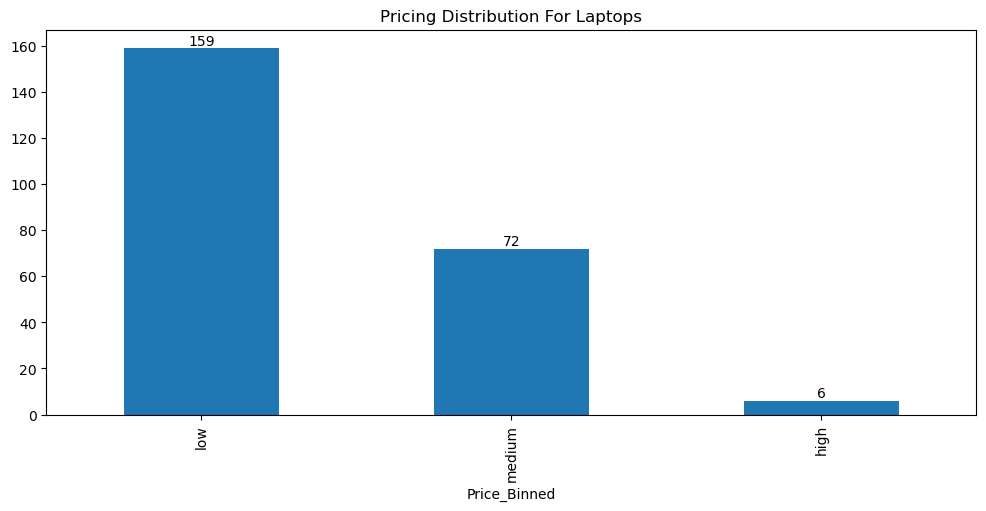

In [62]:
plt.figure(figsize=(12, 5))
graph_for_Price_Binned = laptop_pricing["Price_Binned"] .value_counts().plot(kind='bar',title ="Pricing Distribution For Laptops")
graph_for_Price_Binned.bar_label(graph_for_Price_Binned.containers[0], label_type='edge')

## Regression Plots

### CPU_frequency vs Price

<Axes: xlabel='Price', ylabel='CPU_frequency'>

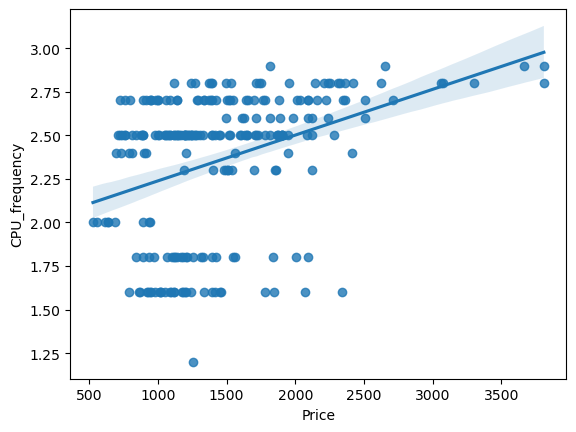

In [65]:
sns.regplot(x= "Price", y="CPU_frequency", data = laptop_pricing)

In [66]:
stats.pearsonr(laptop_pricing["CPU_frequency"],laptop_pricing["Price"])

PearsonRResult(statistic=0.36666555892588604, pvalue=5.5024633507134225e-09)

We can see there is not much correlation between cpu_frequency and price

### Screen_Size_inches vs Price

<Axes: xlabel='Price', ylabel='Screen_Size_inches'>

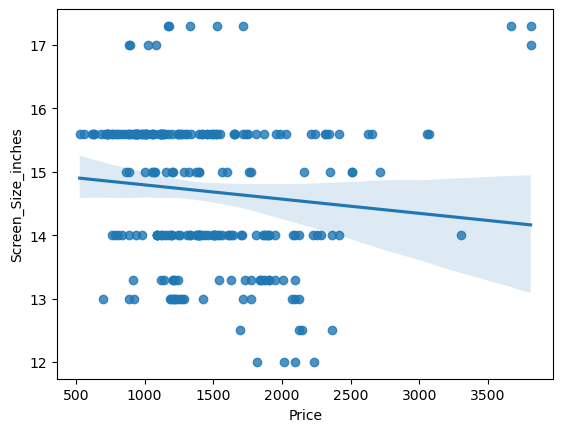

In [69]:
sns.regplot(x= "Price", y="Screen_Size_inches", data = laptop_pricing)

In [70]:
stats.pearsonr(laptop_pricing["Screen_Size_inches"],laptop_pricing["Price"])

PearsonRResult(statistic=-0.11064420817118284, pvalue=0.08853397846830666)

Screen_Size_inches and price have nearly very weak correlation with weak certainity

### Weight_pounds vs Price

<Axes: xlabel='Price', ylabel='Weight_pounds'>

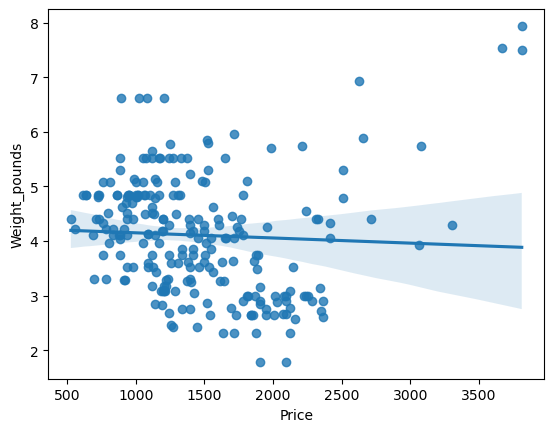

In [73]:
sns.regplot(x= "Price", y="Weight_pounds", data = laptop_pricing)

In [74]:
stats.pearsonr(laptop_pricing["Weight_pounds"],laptop_pricing["Price"])

PearsonRResult(statistic=-0.05031225837751547, pvalue=0.43976938534338944)

Weight_pounds and price cant be stated based on correlation between each other as seen from above results

## Box Plots for Categorical Variables

### Manufacturer vs Price

<Axes: xlabel='Manufacturer', ylabel='Price'>

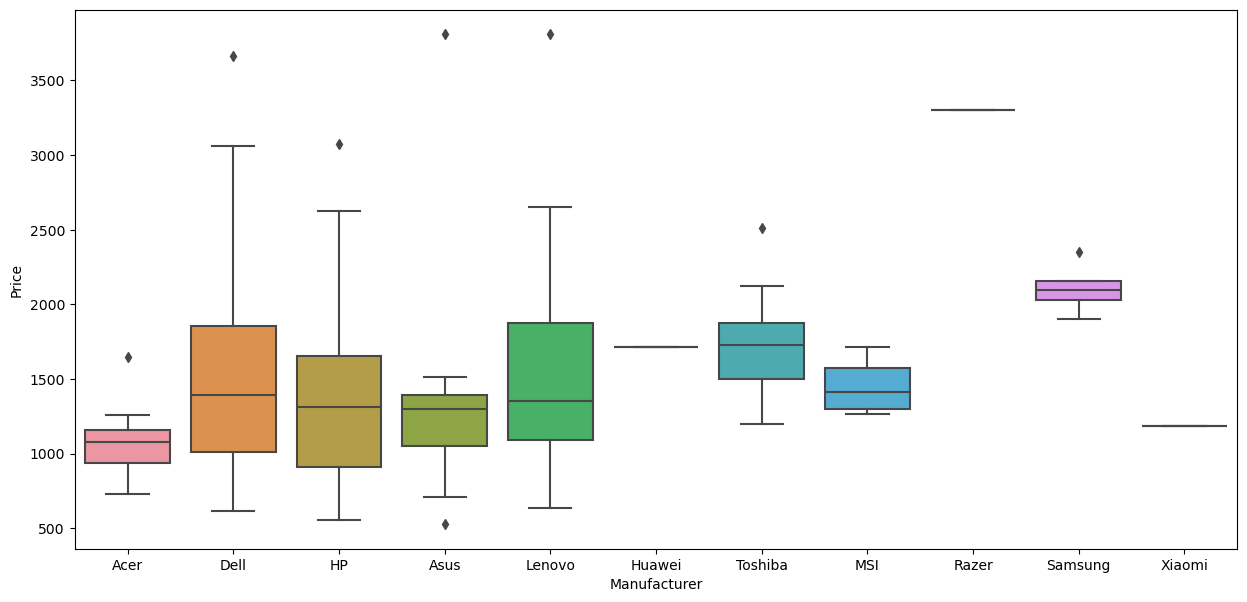

In [78]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "Manufacturer", y ="Price")

### Category vs Price

<Axes: xlabel='Category', ylabel='Price'>

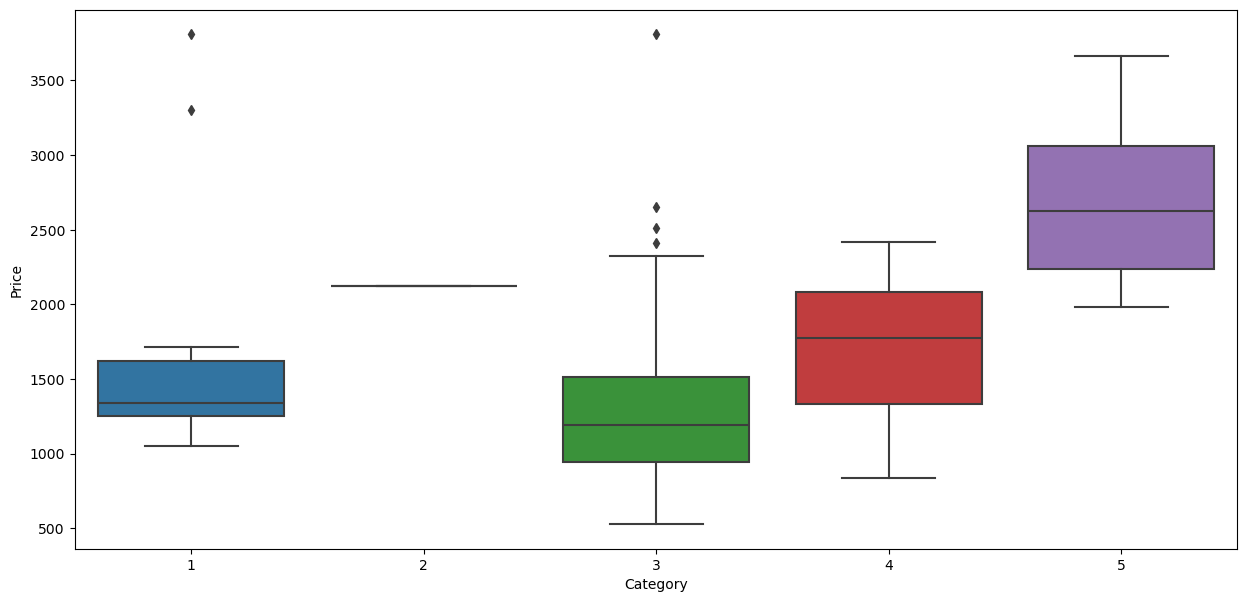

In [80]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "Category", y ="Price")

### Screen vs Price

<Axes: xlabel='Type_of_Screen', ylabel='Price'>

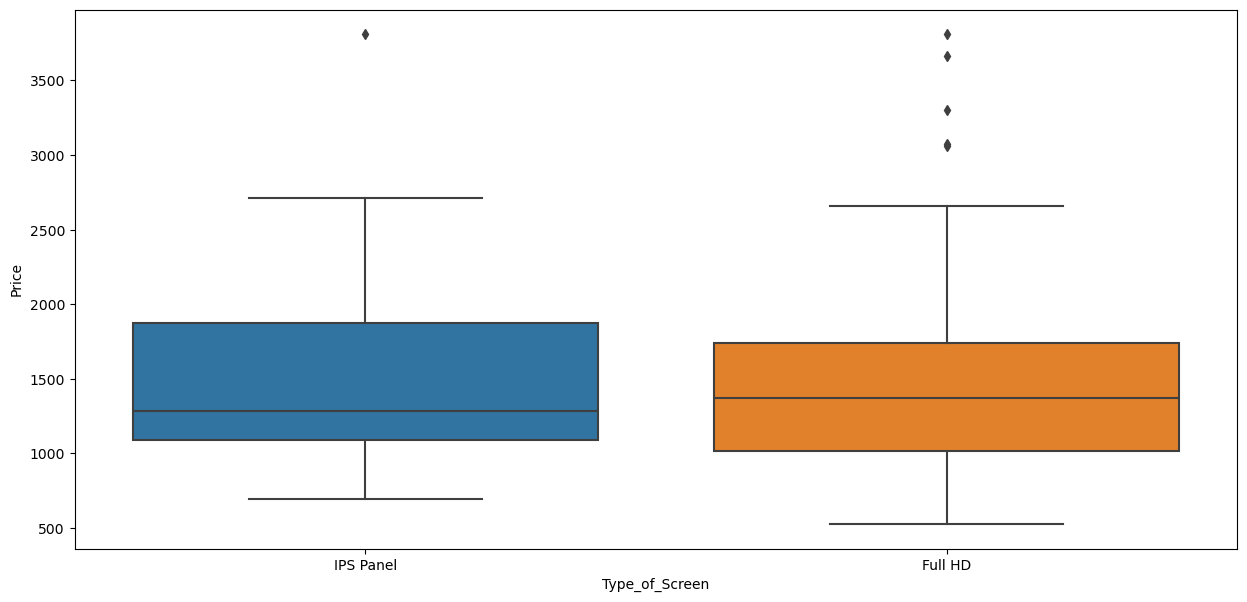

In [82]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "Type_of_Screen", y ="Price")

### GPU vs Price

<Axes: xlabel='GPU', ylabel='Price'>

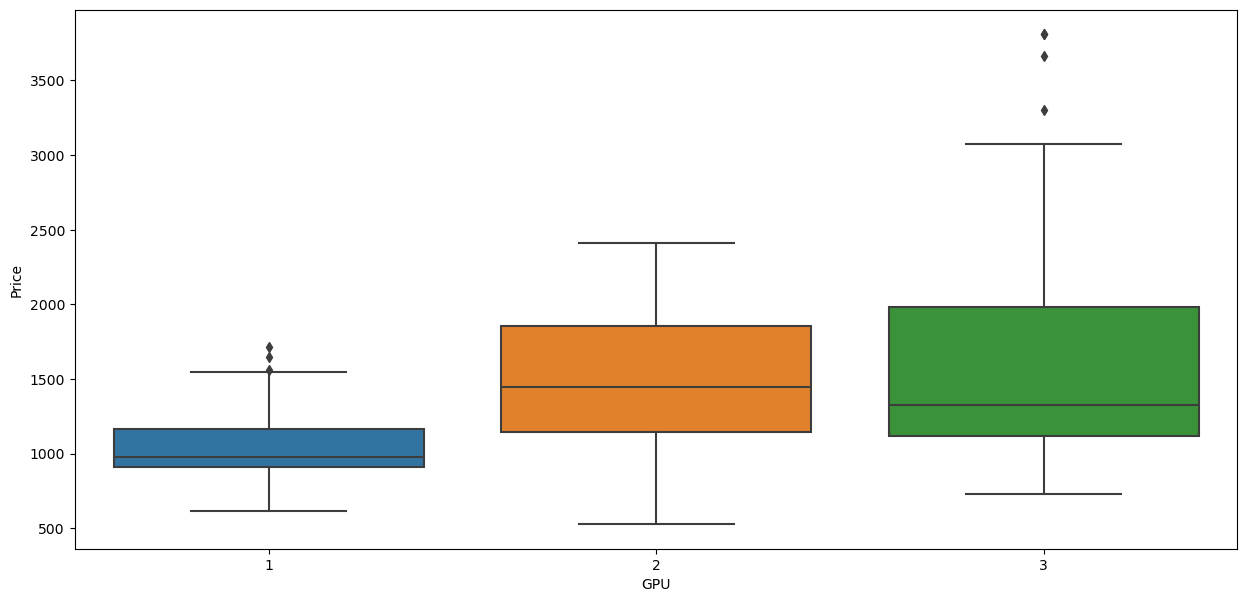

In [84]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "GPU", y ="Price")

### OS vs Price

<Axes: xlabel='OS', ylabel='Price'>

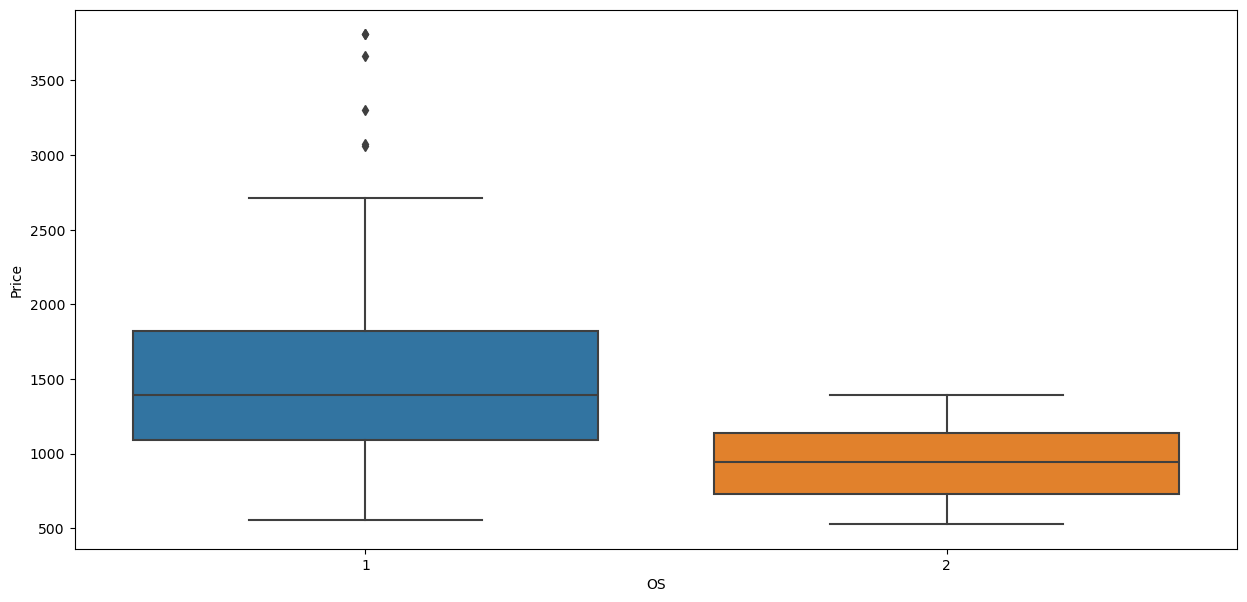

In [86]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "OS", y ="Price")

### CPU_core vs Price

<Axes: xlabel='CPU_core', ylabel='Price'>

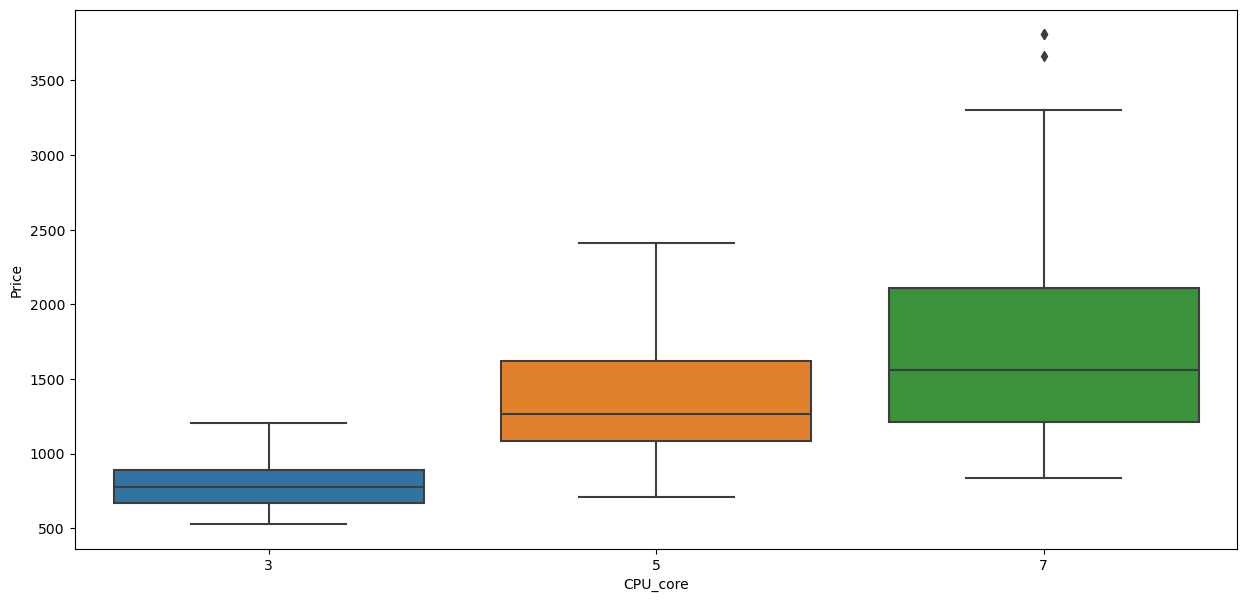

In [88]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "CPU_core", y ="Price")

### RAM_GB vs Price

<Axes: xlabel='RAM_GB', ylabel='Price'>

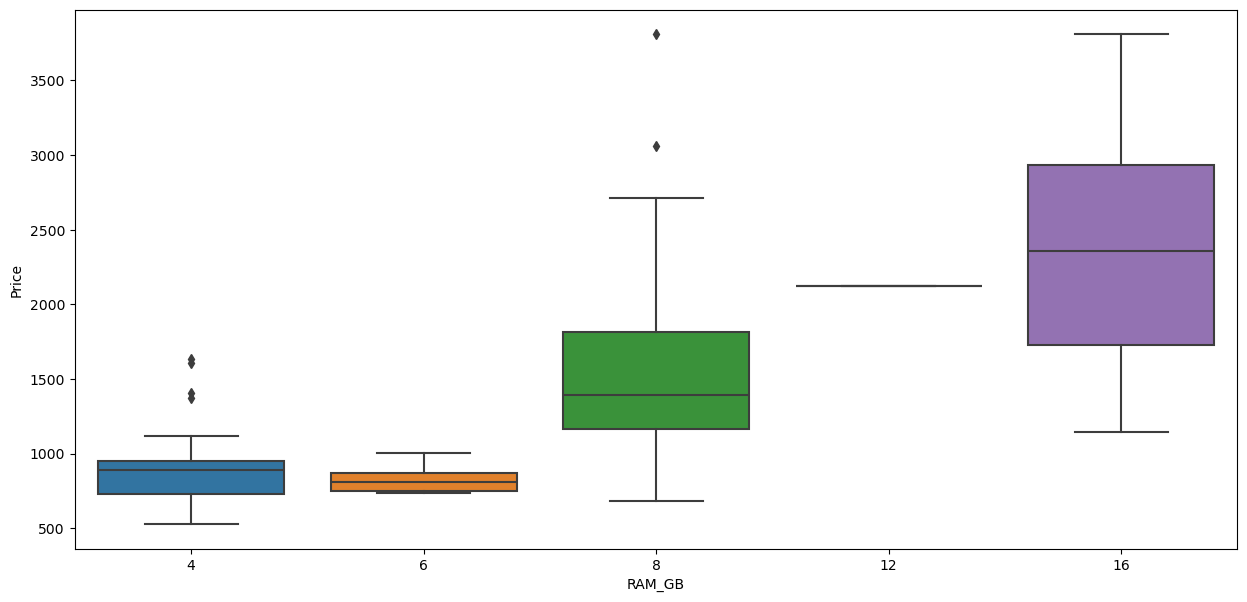

In [90]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "RAM_GB", y ="Price")

### Storage_GB_SSD vs Price

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

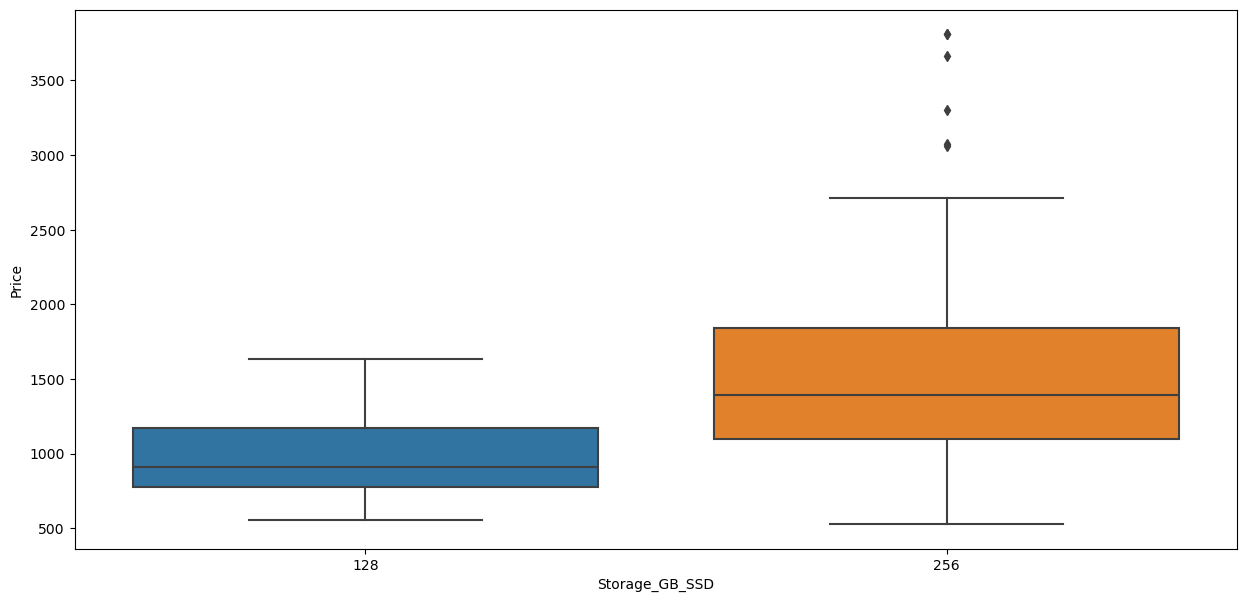

In [92]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "Storage_GB_SSD", y ="Price")

## Group By and Pivot Table

### "GPU", "CPU_core", "Price"

In [95]:
laptop_pricing_group1 = laptop_pricing[["GPU", "CPU_core", "Price" ]]
laptop_pricing_group1_grouped = laptop_pricing_group1.groupby(["GPU", "CPU_core"],as_index = False).mean()

In [96]:
laptop_pricing_group1_pivot = laptop_pricing_group1_grouped.pivot(index = "CPU_core", columns = "GPU")

In [97]:
laptop_pricing_group1_pivot

Price                          
GPU                 1            2            3
CPU_core                                       
3          769.250000   785.076923   784.000000
5          998.500000  1462.197674  1220.680000
7         1167.941176  1744.621622  1945.097561

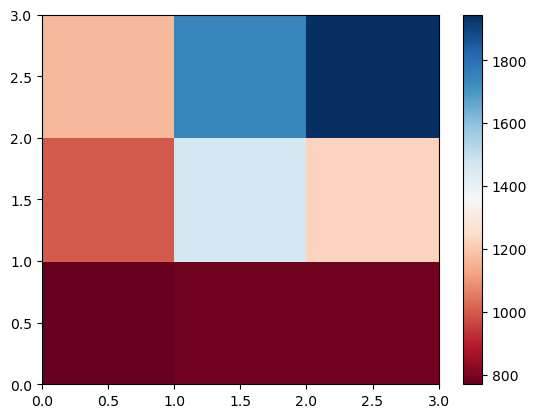

In [98]:
plt.pcolor(laptop_pricing_group1_pivot,cmap = "RdBu")
plt.colorbar()

We can see that GPU 3, with CPU_core 7 has highest price

# One Hot Encoding

In [101]:
laptop_pricing.dtypes

Manufacturer            object
Category                 int64
Type_of_Screen          object
GPU                      int64
OS                       int64
CPU_core                 int64
Screen_Size_inches     float64
CPU_frequency          float64
RAM_GB                   int64
Storage_GB_SSD           int64
Weight_pounds          float64
Price                    int64
Price_Binned          category
dtype: object

checking the non numeric or categorical variables

In [103]:
laptop_pricing.select_dtypes(exclude=['float64','int64'])

,Manufacturer,Type_of_Screen,Price_Binned
0,Acer,IPS Panel,low
1,Dell,Full HD,low
2,Dell,Full HD,low
3,Dell,IPS Panel,low
4,HP,Full HD,low
...,...,...,...
233,Lenovo,IPS Panel,medium
234,Toshiba,Full HD,medium
235,Lenovo,IPS Panel,medium
236,Lenovo,Full HD,low


In [104]:
laptop_pricing.columns

Index(['Manufacturer', 'Category', 'Type_of_Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_inches', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_pounds', 'Price', 'Price_Binned'],
      dtype='object')

In [105]:
Columns_needed_to_create_dummies = laptop_pricing.select_dtypes(exclude=['float64','int64']).columns 

In [106]:
Columns_needed_to_create_dummies

Index(['Manufacturer', 'Type_of_Screen', 'Price_Binned'], dtype='object')

In [107]:
for var in Columns_needed_to_create_dummies:
    cat_list = pd.get_dummies(laptop_pricing[var], prefix=var)
    existing_dummy_columns = [col for col in laptop_pricing.columns if col.startswith(var + '_')]
    if existing_dummy_columns:
        laptop_pricing = laptop_pricing.drop(columns=existing_dummy_columns)
    laptop_pricing_with_dummies = laptop_pricing.join(cat_list)
    laptop_pricing = laptop_pricing_with_dummies
cat_vars = Columns_needed_to_create_dummies
data_vars=laptop_pricing.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars or i in Columns_needed_to_create_dummies]
laptop_pricing_final=laptop_pricing[to_keep]
laptop_pricing_final.columns.values

array(['Manufacturer', 'Category', 'Type_of_Screen', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_inches', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_pounds', 'Price', 'Price_Binned',
       'Manufacturer_Acer', 'Manufacturer_Asus', 'Manufacturer_Dell',
       'Manufacturer_HP', 'Manufacturer_Huawei', 'Manufacturer_Lenovo',
       'Manufacturer_MSI', 'Manufacturer_Razer', 'Manufacturer_Samsung',
       'Manufacturer_Toshiba', 'Manufacturer_Xiaomi',
       'Type_of_Screen_Full HD', 'Type_of_Screen_IPS Panel',
       'Price_Binned_low', 'Price_Binned_medium', 'Price_Binned_high'],
      dtype=object)

# Model Development and Evaluation

### Simple Linear Regression

#### CPU_frequency & Price

In [111]:
lm1 = LinearRegression()

In [112]:
X = laptop_pricing[["CPU_frequency"]]
Y = laptop_pricing["Price"]

In [113]:
lm1.fit(X,Y)

LinearRegression()

In [114]:
Y_predicted1 = lm1.predict(X)

/var/folders/p6/k6khhfmx2x35mly7crf32_5m0000gn/T/ipykernel_29614/2524222154.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y, hist = False, color = "r", label = "Actual_Value")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/p6/k6khhfmx2x35mly7crf32_5m0000gn/T/ipykernel_29614/2524222154.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt you

<Axes: xlabel='Price', ylabel='Density'>

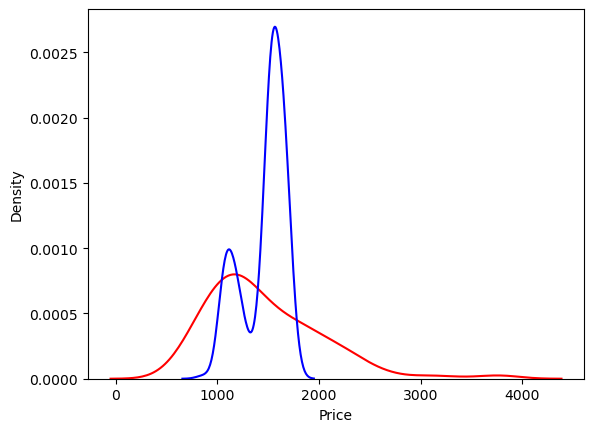

In [115]:
sns.distplot(Y, hist = False, color = "r", label = "Actual_Value")
sns.distplot(Y_predicted1, hist = False, color = "b", label = "Predicted_Value" )

In [116]:
mse_1 = mean_squared_error(Y, Y_predicted1)

In [117]:
mse_1

284583.4405868628

In [118]:
r2_score_1 = lm1.score(X, Y)

In [119]:
r2_score_1

0.13444363210243282

### Multiple Linear Regression

#### 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category' & Price

In [122]:
Set_1 = laptop_pricing[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]

In [123]:
Y = laptop_pricing['Price']

In [124]:
lm2 = LinearRegression()

In [125]:
lm2.fit(Set_1, Y)

LinearRegression()

In [126]:
Y_predicted2 = lm2.predict(Set_1)

/var/folders/p6/k6khhfmx2x35mly7crf32_5m0000gn/T/ipykernel_29614/188903519.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y, hist = False, color = "r", label = "Actual_Value")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/p6/k6khhfmx2x35mly7crf32_5m0000gn/T/ipykernel_29614/188903519.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your 

<Axes: xlabel='Price', ylabel='Density'>

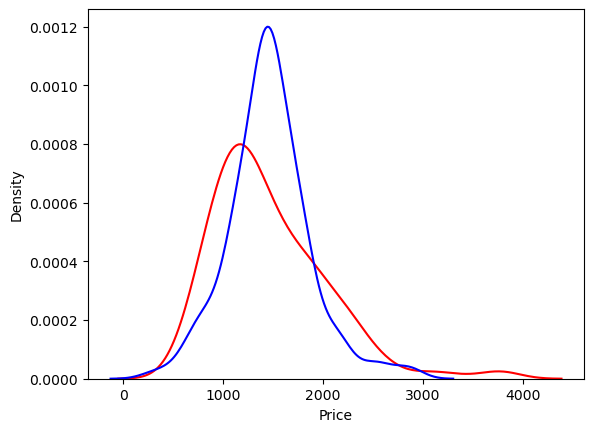

In [127]:
sns.distplot(Y, hist = False, color = "r", label = "Actual_Value")
sns.distplot(Y_predicted2, hist = False, color = "b", label = "Predicted_Value" )

In [128]:
mse_2 = mean_squared_error(Y, Y_predicted2)
r2_score_2 = lm2.score(Set_1, Y)

In [129]:
mse_2

161680.57263893107

In [130]:
r2_score_2

0.5082509055187374

### Polynomial Regression

#### CPU_frequency & Price 

In [133]:
X = laptop_pricing["CPU_frequency"]

In [134]:
f = np.polyfit(X, Y, 3)


In [135]:
p = np.poly1d(f)
# creating a polynomial function with degree 3

In [136]:
p

poly1d([ 1397.77295483, -7817.14432903, 14237.47770486, -7238.3350619 ])

In [137]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    X_new = np.linspace(independent_variable.min(),independent_variable.max(), 100)
    Y_predicted_poly = model(X_new)
    plt.plot(independent_variable, dependent_variable, '.', X_new, Y_predicted_poly, '*')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

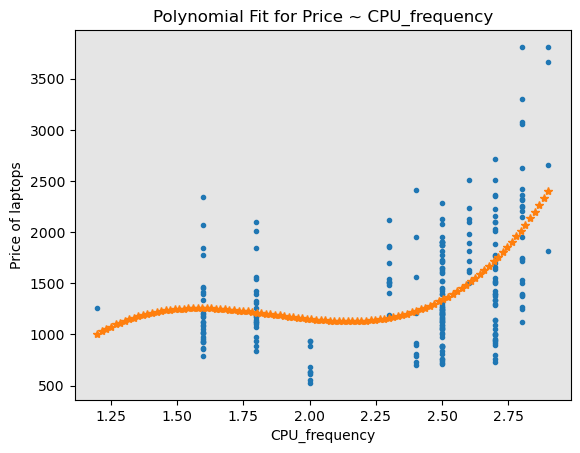

In [138]:
PlotPolly(p, X, Y, "CPU_frequency")

In [139]:
mse_poly_3 = mean_squared_error(Y, p(X))
r2_squared_poly = r2_score(Y, p(X))

In [140]:
mse_poly_3

241024.8630384873

In [141]:
r2_squared_poly

0.2669264079653123

### Pipelines for Multidimensional Polynomial Regression

In [143]:
Input1 =[("scale", StandardScaler()),("polynomial_feature", PolynomialFeatures(degree = 2)),("model", LinearRegression())]

In [144]:
pipe1 = Pipeline(Input1)

In [145]:
pipe1

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial_feature', PolynomialFeatures()),
                ('model', LinearRegression())])

In [146]:
pipe1.fit(Set_1, Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial_feature', PolynomialFeatures()),
                ('model', LinearRegression())])

In [147]:
Y_predicted_multiple_polynomial = pipe1.predict(Set_1)

In [148]:
mse_multidimensional_polynomial = mean_squared_error(Y,Y_predicted_multiple_polynomial )

In [149]:
mse_multidimensional_polynomial

120595.78026105175

In [150]:
r2_multidimensional_polynomial = r2_score(Y,Y_predicted_multiple_polynomial)

In [151]:
r2_multidimensional_polynomial

0.6332097000047736

## Conclusion After Model Development and Evaluation

We can see that mse and r2 squared of multiple models is as below:

1) Simple Linear regression:

mse = 284583.4405868628
R^2 = 13.4 %

2) Multiple Linear Regression:

mse = 161680.57263893107
R^2 = 50.8

3) Polynomial Regression:

mse =241024.8630384873
R^2 = 26.69 %

4) Multidimensional Polynomial Regression:

mse = 120595.78026105175
R^2 = 63.32 %

We choose to go with Multidimensional Polynomial regression which helps us with better predictions

# Model Evaluation and Refinement

## Training and Test Data Split

In [157]:
x_data = laptop_pricing.drop('Price', axis =1)
y_data = laptop_pricing["Price"]

In [158]:
(x_train, x_test, y_train, y_test) = train_test_split(x_data,y_data, test_size = 0.1, random_state =1)

### Cross Validation

In [160]:
lre = LinearRegression()

In [161]:
Rcross = cross_val_score(lre, laptop_pricing[['CPU_frequency']], y_data, cv=4)

In [162]:
Rcross

array([-0.82012763,  0.10035872,  0.11202939, -0.03662978])

In [163]:
Rcross.std()

0.3849579786664709

In [164]:
Rcross.mean()

-0.16109232388595093

## Overfitting, underfitting, model refinement

In [331]:
(x_train, x_test, y_train, y_test) = train_test_split(x_data, y_data, test_size = 0.5, random_state = 1)

In [333]:
lre1 = LinearRegression()
rsquared = []
degree = [1,2,3,4,5]
for n in degree:
    poly1 = PolynomialFeatures(degree=n)
    x_train_pr = poly1.fit_transform(x_train[["CPU_frequency"]])
    x_test_pr = poly1.fit_transform(x_test[["CPU_frequency"]])
    lre1.fit(x_train_pr, y_train)
    lre1.predict(x_test_pr)
    lre1.score(x_test_pr,y_test)
    rsquared.append(lre1.score(x_test_pr,y_test))

rsquared

[0.028619411720164023,
 0.14520883323305067,
 0.15681605330238457,
 0.12721267717781926,
 0.03547064602798655]

Text(0, 0.5, 'rsquared')

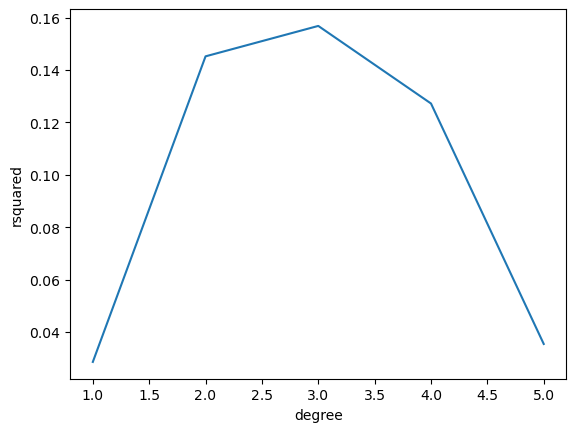

In [335]:
plt.plot(degree, rsquared)
plt.xlabel("degree")
plt.ylabel("rsquared")

## Ridge Regression

In [338]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

In [340]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha) 
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|███| 999/999 [00:03<00:00, 264.39it/s, Test Score=0.473, Train Score=0.649]


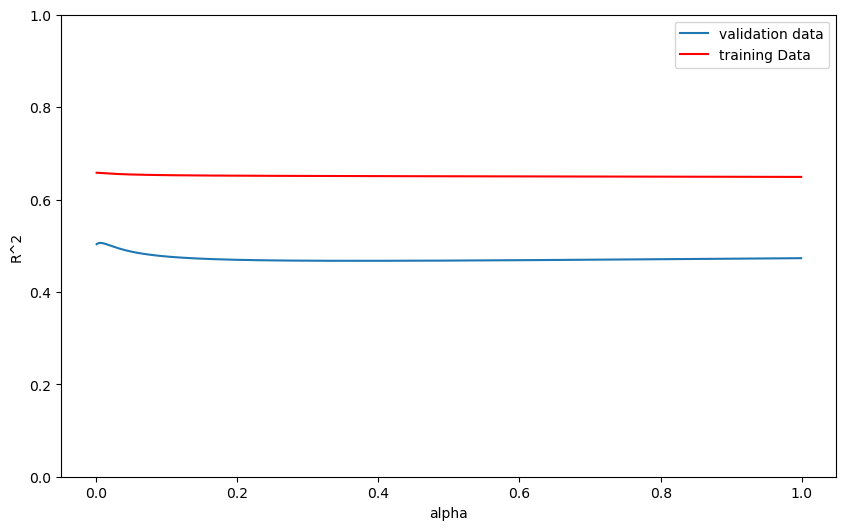

In [342]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

## Grid Search

In [344]:
parameters1= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]

In [346]:
RR = Ridge()

In [348]:
grid1 = GridSearchCV(RR,  parameters1, cv= 4)
grid1.fit(x_train_pr,y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [350]:
grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [352]:
BestRR=grid1.best_estimator_

In [354]:
BestRR

Ridge(alpha=1)